# Rf 6 0 8_Fitresultaspdf

Likelihood and minimization: representing the parabolic approximation of the fit as a multi-variate Gaussian on the parameters of the fitted p.d.f.




**Author:** Clemens Lange, Wouter Verkerke (C++ version)  
<i><small>This notebook tutorial was automatically generated with <a href= "https://github.com/root-project/root/blob/master/documentation/doxygen/converttonotebook.py">ROOTBOOK-izer</a> from the macro found in the ROOT repository  on Thursday, August 29, 2019 at 03:00 AM.</small></i>

In [1]:
import ROOT

Welcome to JupyROOT 6.18/03


Create model and dataset
-----------------------------------------------

Observable

In [2]:
x = ROOT.RooRealVar("x", "x", -20, 20)


RooFit v3.60 -- Developed by Wouter Verkerke and David Kirkby 
                Copyright (C) 2000-2013 NIKHEF, University of California & Stanford University
                All rights reserved, please read http://roofit.sourceforge.net/license.txt



Model (intentional strong correlations)

In [3]:
mean = ROOT.RooRealVar("mean", "mean of g1 and g2", 0, -1, 1)
sigma_g1 = ROOT.RooRealVar("sigma_g1", "width of g1", 2)
g1 = ROOT.RooGaussian("g1", "g1", x, mean, sigma_g1)

sigma_g2 = ROOT.RooRealVar("sigma_g2", "width of g2", 4, 3.0, 5.0)
g2 = ROOT.RooGaussian("g2", "g2", x, mean, sigma_g2)

frac = ROOT.RooRealVar("frac", "frac", 0.5, 0.0, 1.0)
model = ROOT.RooAddPdf(
    "model", "model", ROOT.RooArgList(
        g1, g2), ROOT.RooArgList(frac))

Generate 1000 events

In [4]:
data = model.generate(ROOT.RooArgSet(x), 1000)

Fit model to data
----------------------------------

In [5]:
r = model.fitTo(data, ROOT.RooFit.Save())

[#1] INFO:Minization -- RooMinimizer::optimizeConst: activating const optimization
[#1] INFO:Minization --  The following expressions will be evaluated in cache-and-track mode: (g1,g2)
 **********
 **    1 **SET PRINT           1
 **********
 **********
 **    2 **SET NOGRAD
 **********
 PARAMETER DEFINITIONS:
    NO.   NAME         VALUE      STEP SIZE      LIMITS
     1 frac         5.00000e-01  1.00000e-01    0.00000e+00  1.00000e+00
     2 mean         0.00000e+00  2.00000e-01   -1.00000e+00  1.00000e+00
     3 sigma_g2     4.00000e+00  2.00000e-01    3.00000e+00  5.00000e+00
 **********
 **    3 **SET ERR         0.5
 **********
 **********
 **    4 **SET PRINT           1
 **********
 **********
 **    5 **SET STR           1
 **********
 NOW USING STRATEGY  1: TRY TO BALANCE SPEED AGAINST RELIABILITY
 **********
 **    6 **MIGRAD        1500           1
 **********
 FIRST CALL TO USER FUNCTION AT NEW START POINT, WITH IFLAG=4.
 START MIGRAD MINIMIZATION.  STRATEGY  1.  CONVERGEN

Create MV Gaussian pdf of fitted parameters
------------------------------------------------------------------------------------

In [6]:
parabPdf = r.createHessePdf(ROOT.RooArgSet(frac, mean, sigma_g2))

Some exercises with the parameter pdf
-----------------------------------------------------------------------------

Generate 100K points in the parameter space, from the MVGaussian p.d.f.

In [7]:
d = parabPdf.generate(ROOT.RooArgSet(mean, sigma_g2, frac), 100000)

Sample a 3-D histogram of the p.d.f. to be visualized as an error
ellipsoid using the GLISO draw option

In [8]:
hh_3d = parabPdf.createHistogram("mean,sigma_g2,frac", 25, 25, 25)
hh_3d.SetFillColor(ROOT.kBlue)

Project 3D parameter p.d.f. down to 3 permutations of two-dimensional p.d.f.s
The integrations corresponding to these projections are performed analytically
by the MV Gaussian p.d.f.

In [9]:
pdf_sigmag2_frac = parabPdf.createProjection(ROOT.RooArgSet(mean))
pdf_mean_frac = parabPdf.createProjection(ROOT.RooArgSet(sigma_g2))
pdf_mean_sigmag2 = parabPdf.createProjection(ROOT.RooArgSet(frac))

Make 2D plots of the 3 two-dimensional p.d.f. projections

In [10]:
hh_sigmag2_frac = pdf_sigmag2_frac.createHistogram("sigma_g2,frac", 50, 50)
hh_mean_frac = pdf_mean_frac.createHistogram("mean,frac", 50, 50)
hh_mean_sigmag2 = pdf_mean_sigmag2.createHistogram("mean,sigma_g2", 50, 50)
hh_mean_frac.SetLineColor(ROOT.kBlue)
hh_sigmag2_frac.SetLineColor(ROOT.kBlue)
hh_mean_sigmag2.SetLineColor(ROOT.kBlue)

Draw the 'sigar'

In [11]:
ROOT.gStyle.SetCanvasPreferGL(True)
ROOT.gStyle.SetPalette(1)
c1 = ROOT.TCanvas("rf608_fitresultaspdf_1", "rf608_fitresultaspdf_1", 600, 600)
hh_3d.Draw("gliso")

c1.SaveAs("rf608_fitresultaspdf_1.png")

Info in <TCanvas::Print>: png file rf608_fitresultaspdf_1.png has been created


Draw the 2D projections of the 3D p.d.f.

In [12]:
c2 = ROOT.TCanvas("rf608_fitresultaspdf_2",
                  "rf608_fitresultaspdf_2", 900, 600)
c2.Divide(3, 2)
c2.cd(1)
ROOT.gPad.SetLeftMargin(0.15)
hh_mean_sigmag2.GetZaxis().SetTitleOffset(1.4)
hh_mean_sigmag2.Draw("surf3")
c2.cd(2)
ROOT.gPad.SetLeftMargin(0.15)
hh_sigmag2_frac.GetZaxis().SetTitleOffset(1.4)
hh_sigmag2_frac.Draw("surf3")
c2.cd(3)
ROOT.gPad.SetLeftMargin(0.15)
hh_mean_frac.GetZaxis().SetTitleOffset(1.4)
hh_mean_frac.Draw("surf3")

Draw the distributions of parameter points sampled from the p.d.f.

In [13]:
tmp1 = d.createHistogram(mean, sigma_g2, 50, 50)
tmp2 = d.createHistogram(sigma_g2, frac, 50, 50)
tmp3 = d.createHistogram(mean, frac, 50, 50)

c2.cd(4)
ROOT.gPad.SetLeftMargin(0.15)
tmp1.GetZaxis().SetTitleOffset(1.4)
tmp1.Draw("lego3")
c2.cd(5)
ROOT.gPad.SetLeftMargin(0.15)
tmp2.GetZaxis().SetTitleOffset(1.4)
tmp2.Draw("lego3")
c2.cd(6)
ROOT.gPad.SetLeftMargin(0.15)
tmp3.GetZaxis().SetTitleOffset(1.4)
tmp3.Draw("lego3")

c2.SaveAs("rf608_fitresultaspdf_2.png")

Info in <TCanvas::Print>: png file rf608_fitresultaspdf_2.png has been created


Draw all canvases 

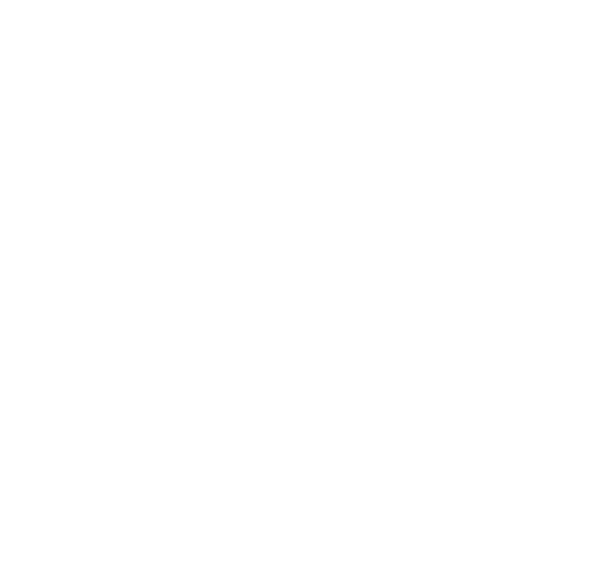

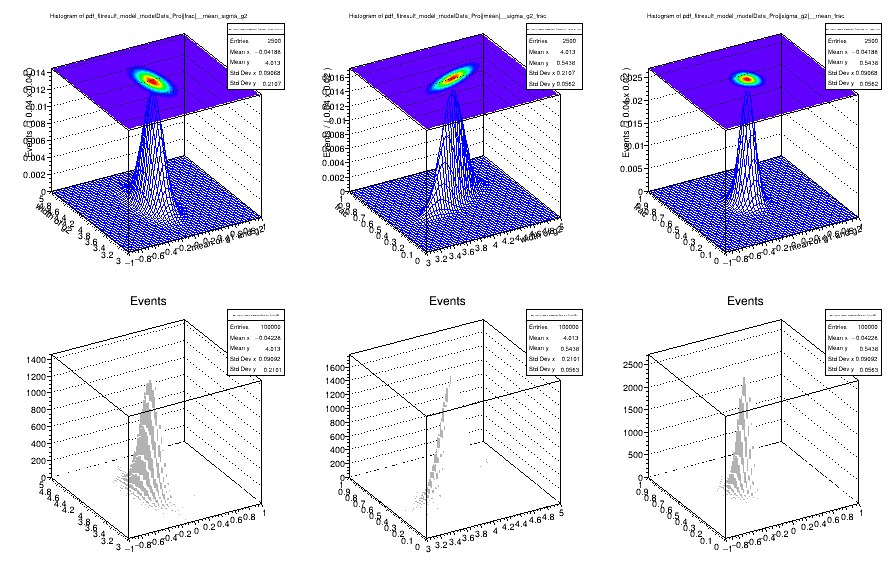

In [14]:
from ROOT import gROOT 
gROOT.GetListOfCanvases().Draw()